In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

170498071/170498071 [==============================] - 69s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
X_train, X_test = X_train / 255.0, X_test / 255.0

y_train, y_test = y_train.flatten(), y_test.flatten()

In [5]:
X_train.shape

(50000, 32, 32, 3)

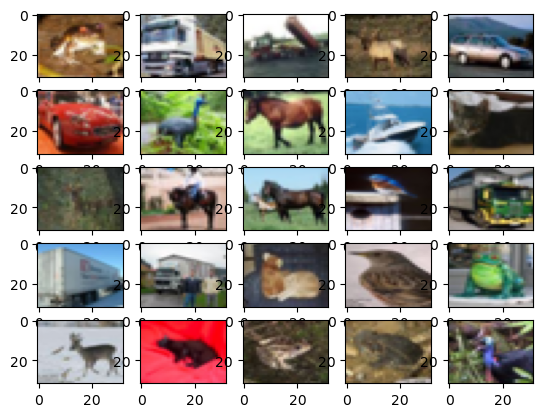

In [6]:
fig, ax = plt.subplots(5, 5)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(X_train[k], aspect='auto')
        k += 1
 
plt.show()

In [7]:
K = len(y_train)
print("number of classes:", K)

number of classes: 50000


In [8]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
 
# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)
 
model = Model(i, x)
 
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
M= model.fit(
  X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.4756 - accuracy: 0.8397 - val_loss: 0.6223 - val_accuracy: 0.7962
Epoch 2/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.3875 - accuracy: 0.8666 - val_loss: 0.6546 - val_accuracy: 0.7969
Epoch 3/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.3263 - accuracy: 0.8880 - val_loss: 0.6525 - val_accuracy: 0.7912
Epoch 4/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.2638 - accuracy: 0.9101 - val_loss: 0.5973 - val_accuracy: 0.8259
Epoch 5/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.2233 - accuracy: 0.9231 - val_loss: 0.6477 - val_accuracy: 0.8175
Epoch 6/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.1967 - accuracy: 0.9326 - val_loss: 0.6993 - val_accuracy: 0.8207
Epoch 7/20
1563/1563 [==============================] - 34s 21ms/step - loss: 0.1748 - accuracy: 0.9403 - val_loss: 0.6648 -

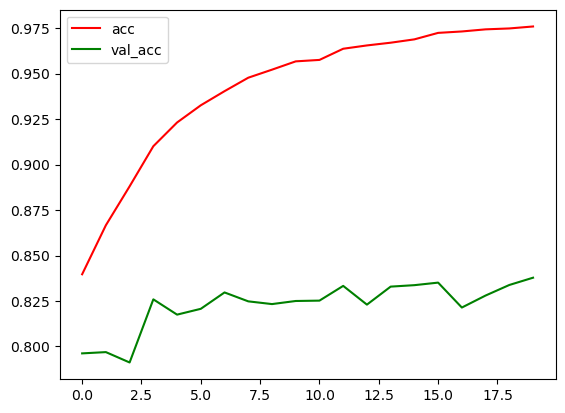

In [23]:
plt.plot(M.history['accuracy'], label='acc', color='red')
plt.plot(M.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

# Transfer Learning

In [11]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [12]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


17225924/17225924 [==============================] - 0s 0us/step


In [13]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(K, activation='softmax')(x)

model1 = Model(inputs=base_model.input, outputs=predictions)


In [14]:
model1.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 

In [29]:
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 16, 16, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 16, 16, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 16, 16, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 16, 16, 32)       128       
 ation)                                                    

In [15]:
M1=model1.fit(
  X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
1563/1563 [==============================] - 58s 27ms/step - loss: 1.1205 - accuracy: 0.6357 - val_loss: 0.8747 - val_accuracy: 0.7127
Epoch 2/20
1563/1563 [==============================] - 40s 25ms/step - loss: 0.8055 - accuracy: 0.7358 - val_loss: 0.8025 - val_accuracy: 0.7369
Epoch 3/20
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6904 - accuracy: 0.7737 - val_loss: 0.6645 - val_accuracy: 0.7809
Epoch 4/20
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6054 - accuracy: 0.8022 - val_loss: 0.6806 - val_accuracy: 0.7744
Epoch 5/20
1563/1563 [==============================] - 40s 25ms/step - loss: 0.5435 - accuracy: 0.8220 - val_loss: 0.7040 - val_accuracy: 0.7606
Epoch 6/20
1563/1563 [==============================] - 40s 25ms/step - loss: 0.4850 - accuracy: 0.8419 - val_loss: 0.5808 - val_accuracy: 0.8080
Epoch 7/20
1563/1563 [==============================] - 40s 25ms/step - loss: 0.4270 - accuracy: 0.8593 - val_loss: 0.6226 -

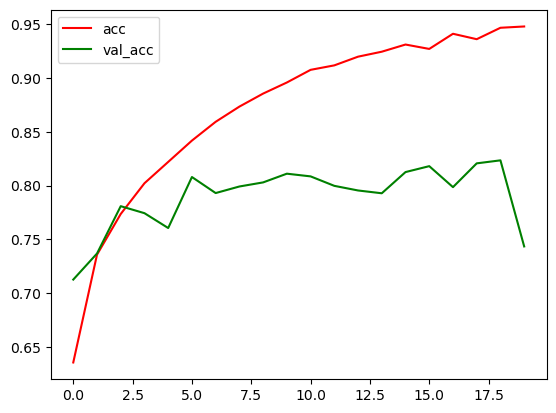

In [16]:
plt.plot(M1.history['accuracy'], label='acc', color='red')
plt.plot(M1.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

1/1 [==============================] - 0s 23ms/step
Original label is deer and predicted label is deer


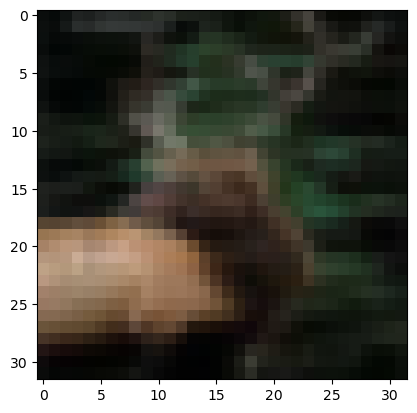

In [21]:
labels = '''airplane automobile bird cat deer dog frog horseship truck'''.split()
 
# select the image from our test dataset

image_number = 420
 
# display the image
plt.imshow(X_test[image_number])
 
# load the image in an array
n = np.array(X_test[image_number])
 
# reshape it
p = n.reshape(1, 32, 32, 3)
 
# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model1.predict(p).argmax()]
 
# load the original label
original_label = labels[y_test[image_number]]
 
    
# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

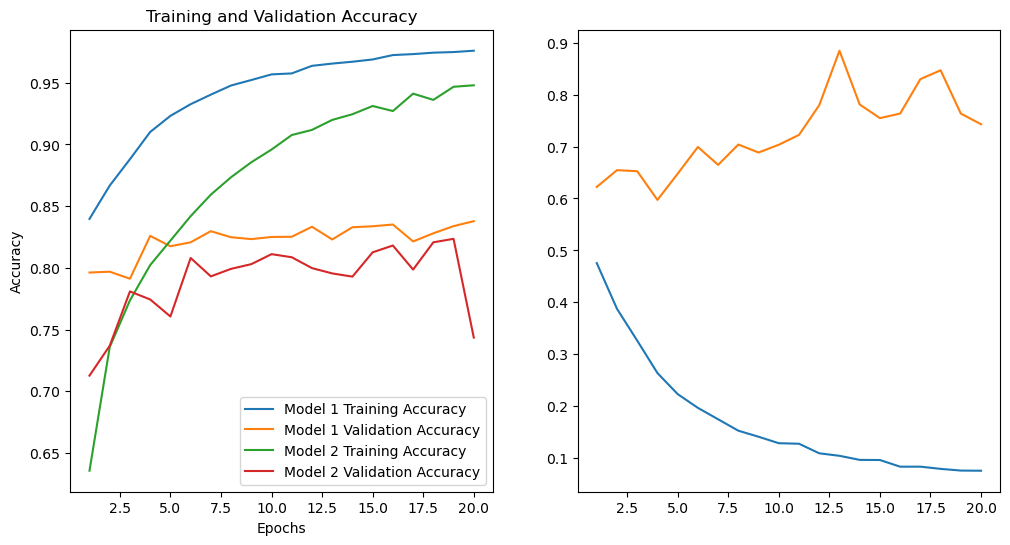

In [24]:
import numpy as np
import matplotlib.pyplot as plt


# Extract the training history
acc1 = M.history['accuracy']
val_acc1 = M.history['val_accuracy']
loss1 = M.history['loss']
val_loss1 = M.history['val_loss']

acc2 = M1.history['accuracy']
val_acc2 = M1.history['val_accuracy']
loss2 = M1.history['loss']
val_loss2 = M1.history['val_loss']

# Plot the accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(acc1) + 1), acc1, label='Model 1 Training Accuracy')
plt.plot(range(1, len(val_acc1) + 1), val_acc1, label='Model 1 Validation Accuracy')
plt.plot(range(1, len(acc2) + 1), acc2, label='Model 2 Training Accuracy')
plt.plot(range(1, len(val_acc2) + 1), val_acc2, label='Model 2 Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the loss
plt.subplot(1, 2, 2)
plt.plot(range(1, len(loss1) + 1), loss1, label='Model 1 Training Loss')
plt.plot(range(1, len(val_loss1) + 1), val_loss1, label='Model 1 Validation Loss')


In [25]:
model.save('CIFAR-10-CNN.h5')

In [26]:
model1.save("CIFAR-10-MobileNet.h5")